In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('../random-search/meta.csv')
print(data.head())

   id          time  test_loss  epochs  accuracy  depth  dense_neurons  \
0   1  1.587562e+09   4.605170      11   0.00825      2            216   
1   2  1.587563e+09   4.605170      11   0.00825      2            214   
2   3  1.587563e+09   4.605170      11   0.00825      3            222   
3   4  1.587563e+09   4.605170      11   0.00825      2            148   
4   5  1.587563e+09   4.600409      13   0.01375      2            197   

   init_filters  use_batchnorm   dropout  batch_size  learning_rate     beta1  \
0            45           True  0.315345          16       0.036774  0.830849   
1            55           True  0.442977          16       0.039264  0.594947   
2            11           True  0.217837         512       0.046149  0.632423   
3            59          False  0.054706          64       0.031557  0.907089   
4            51          False  0.399333        1024       0.031736  0.729378   

      beta2  max_epochs  
0  0.918437         100  
1  0.846155     

In [3]:
data['ntime'] = pd.to_datetime(data['time'])

In [4]:
data['ntime']

0    1970-01-01 00:00:01.587562384
1    1970-01-01 00:00:01.587562504
2    1970-01-01 00:00:01.587562530
3    1970-01-01 00:00:01.587562587
4    1970-01-01 00:00:01.587562638
5    1970-01-01 00:00:01.587562691
6    1970-01-01 00:00:01.587562775
7    1970-01-01 00:00:01.587562860
8    1970-01-01 00:00:01.587562904
9    1970-01-01 00:00:01.587562950
10   1970-01-01 00:00:01.587563057
11   1970-01-01 00:00:01.587563219
12   1970-01-01 00:00:01.587563272
13   1970-01-01 00:00:01.587563318
14   1970-01-01 00:00:01.587563391
15   1970-01-01 00:00:01.587563446
16   1970-01-01 00:00:01.587563618
17   1970-01-01 00:00:01.587563678
18   1970-01-01 00:00:01.587563755
19   1970-01-01 00:00:01.587563806
20   1970-01-01 00:00:01.587563901
21   1970-01-01 00:00:01.587563983
22   1970-01-01 00:00:01.587564043
23   1970-01-01 00:00:01.587564180
24   1970-01-01 00:00:01.587564242
25   1970-01-01 00:00:01.587564300
26   1970-01-01 00:00:01.587564369
27   1970-01-01 00:00:01.587564434
28   1970-01-01 00:0

In [5]:
from datetime import datetime

In [6]:
data['time'] = data['time'].apply(datetime.fromtimestamp)

In [10]:
import os 
if not os.path.exists('images/random-search/'):
    os.makedirs('images/random-search/')

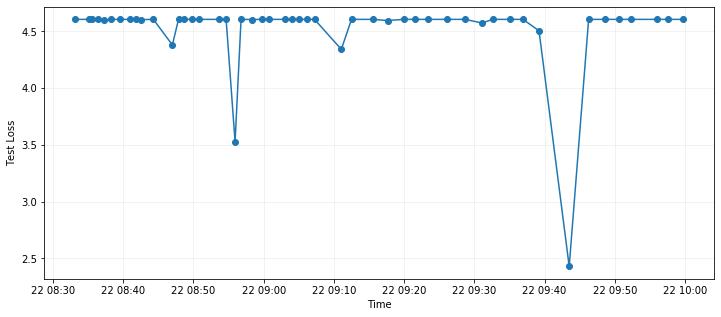

In [25]:
plt.figure(figsize=(12,5))
plt.plot(data['time'], data['test_loss'], marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Test Loss')
plt.savefig('images/random-search/test_loss_over_iters.png', bbox_inches='tight')

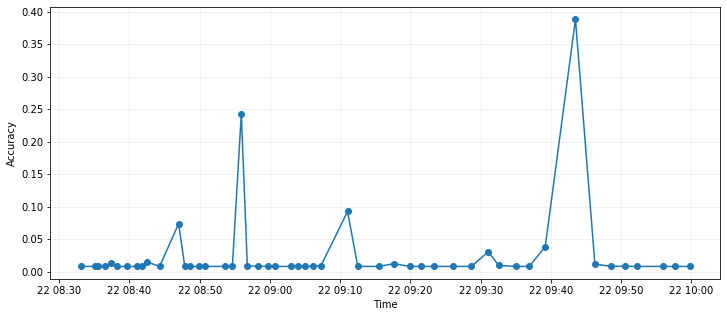

In [24]:
plt.figure(figsize=(12,5))
plt.plot(data['time'], data['accuracy'], marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.savefig('images/random-search/accuracy_over_iters.png', bbox_inches='tight')

In [13]:
best_loss = [min(data['test_loss'][:i]) for i in range(1,len(data))]
best_acc = [max(data['accuracy'][:i]) for i in range(1,len(data))]

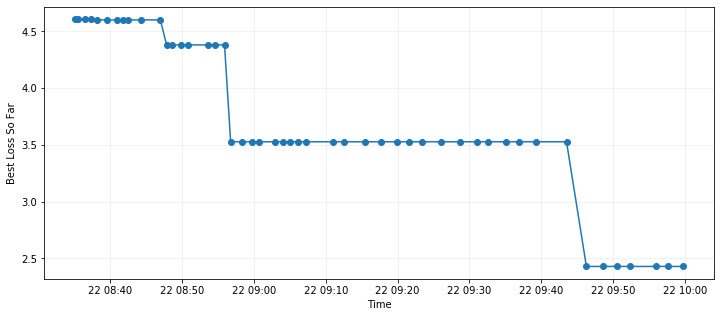

In [23]:
plt.figure(figsize=(12,5))
plt.plot(data['time'][1:], best_loss, marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Best Loss So Far')
plt.savefig('images/random-search/best_loss_so_far_over_iters.png', bbox_inches='tight')

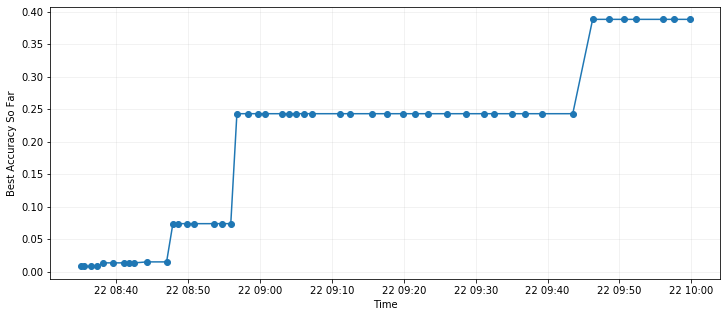

In [26]:
plt.figure(figsize=(12,5))
plt.plot(data['time'][1:], best_acc, marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Best Accuracy So Far')
plt.savefig('images/random-search/best_acc_so_far_over_iters.png', bbox_inches='tight')

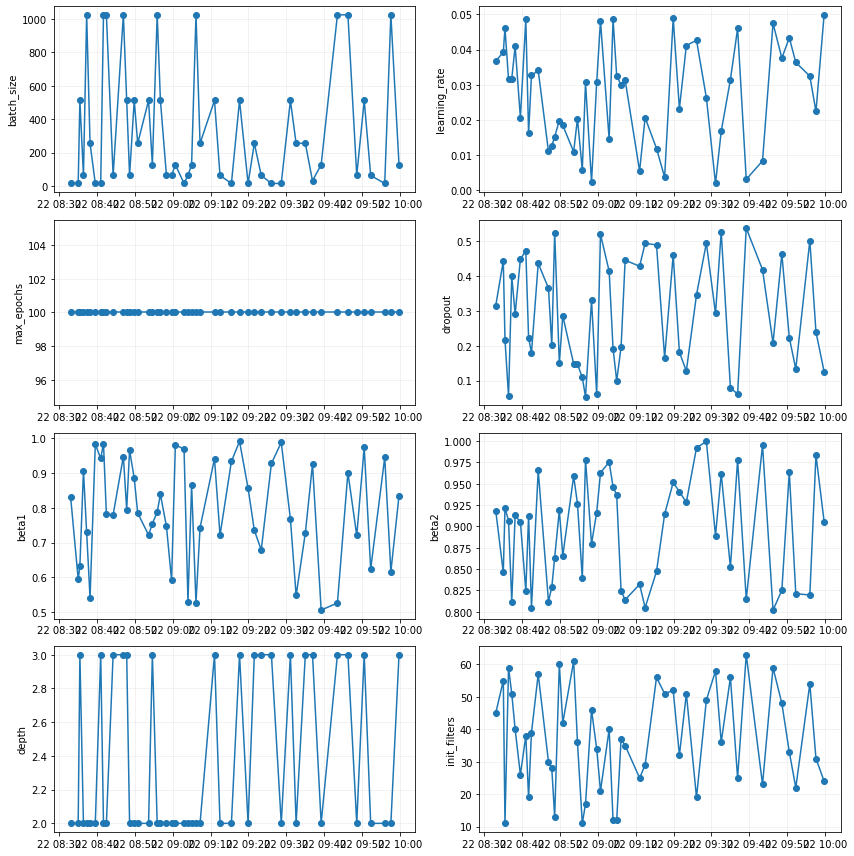

In [16]:
plt.figure(figsize=(12,12))
plot_vars = ['batch_size', 'learning_rate', 'max_epochs', 'dropout', 'beta1', 'beta2', 'depth', 'init_filters']

for i,plot in enumerate(plot_vars):
    plt.subplot(4,2,i+1)
    plt.plot(data['time'], data[plot], marker='o')
    plt.grid(alpha=0.2)
    plt.ylabel(plot)
    
plt.tight_layout()
plt.savefig('images/random-search/parameter_tuning.png', bbox_inches='tight')

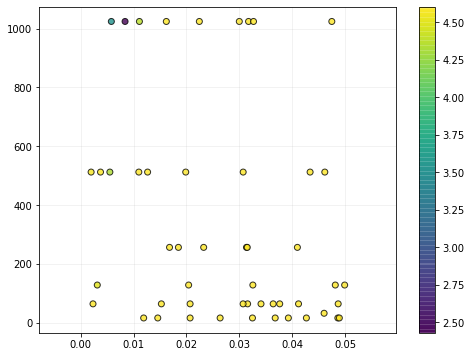

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(data['learning_rate'], data['batch_size'], c=data['test_loss'], marker='o',
           edgecolor='k', alpha=0.8)
plt.colorbar()
plt.grid(alpha=0.2)

In [17]:
best_trial = data['id'].values[np.argmin(data['test_loss'].values)]
best_metrics = pd.read_csv('../random-search/metrics/metrics.{}.csv'.format(best_trial))

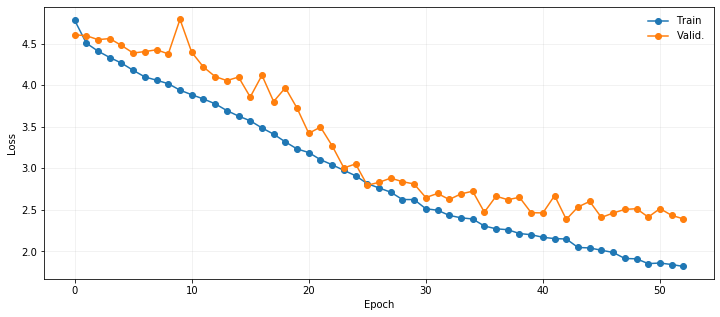

In [18]:
plt.figure(figsize=(12,5))
plt.plot(best_metrics['train_loss'], label='Train', marker='o')
plt.plot(best_metrics['valid_loss'], label='Valid.', marker='o')
plt.grid(alpha=0.2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.savefig('images/random-search/best_training_loss.png', bbox_inches='tight')

In [22]:
data.iloc[best_trial-1]

id                                          43
time                2020-04-22 09:43:29.978469
test_loss                              2.42979
epochs                                      53
accuracy                                 0.388
depth                                        3
dense_neurons                              166
init_filters                                23
use_batchnorm                             True
dropout                                0.41842
batch_size                                1024
learning_rate                       0.00839464
beta1                                 0.526564
beta2                                 0.995222
max_epochs                                 100
ntime            1970-01-01 00:00:01.587566609
Name: 42, dtype: object